[[ 0.8 -0.4]
 [ 0.6 -1. ]
 [-0.8  0.2]
 [ 0.  -0.2]
 [-0.4  0.2]
 [-0.2  0.4]
 [ 0.   0.2]
 [ 0.2  1. ]
 [ 0.6 -0.2]
 [ 0.8  0.6]
 [-0.8  0.4]
 [ 0.6  0.4]
 [ 0.4  0. ]
 [-0.8  1. ]
 [-0.2 -0.6]
 [ 0.4  1. ]
 [-0.4  0.4]
 [ 0.2  0.4]
 [ 0.8 -0.2]
 [-0.4 -0.2]
 [ 0.4  0.4]
 [-0.2  1. ]
 [-0.  -0.2]
 [ 0.4 -0.8]
 [-0.2  0.6]
 [ 0.6 -0.4]
 [-0.6 -0. ]
 [-0.4  0.4]
 [-0.6 -0.4]
 [ 0.6  0.2]
 [ 0.8  1. ]
 [ 0.6 -0.6]
 [ 0.2 -0. ]
 [-0.2  0.4]
 [ 0.6  0.4]
 [-0.8  0.4]
 [-0.8 -0.6]
 [ 0.8 -0.2]
 [-0.8  0.4]
 [-0.6  0.2]
 [-0.4 -1. ]
 [ 1.  -0.8]
 [ 0.  -0.4]
 [ 0.4  0.6]
 [ 0.2  0.2]
 [-0.8  0.4]
 [-0.6 -0. ]
 [-1.  -0.4]
 [ 0.8  0.2]
 [ 0.  -0.2]]
[-1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1.
 -1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1. -1.  1.
  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1.]


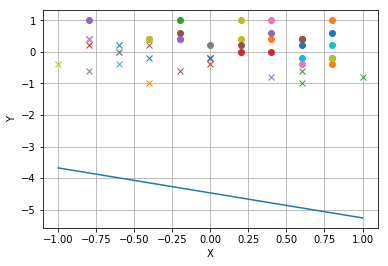

In [304]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
count = 50
np.random.seed(6)
Data = (np.random.rand(count,2) - 0.5)*2
Data = np.around(Data * 5) / 5
print(Data)

# Unknown target function
l = (np.random.rand(2,2) - 0.5)*2
a = (l[1,1] - l[1,0]) / (l[0,1] - l[0,0])
b = l[1,0] - slope * l[0,0]
x = np.linspace(-1,1)
y = a * x + b

# Perpendicular line
xp = b / (-1/a - a)
yp = xp * -1/a
g = [xp, yp]


# Classifying the target function

Target = np.zeros(count)
for i in range(0,count):
    if (np.dot(g, Data[i,:]) > 0):
        Target[i] = 1
    else:
        Target[i] = -1

print(Target)
        
line = plt.figure();
plt.plot(x,y)

for i in range(0,count):
    if(Target[i] == 1):
        plt.plot(Data[i,0],Data[i,1], 'x')
    else:
        plt.plot(Data[i,0],Data[i,1], 'o')

plt.grid(1);
plt.xlabel('X');
plt.ylabel('Y');
plt.show()

In [305]:
# Ein function

def Ein(w, x, y):
    E = 0
    for i in range(0, count ):
        d = np.dot(w, x[i])
        if(d == 0):
            E = E + 1
        
        if(d > 0 and y[i] == -1):
            E = E + 1
            
        if(d < 0 and y[i] == 1):
            E = E + 1
    return E

def VectorToAB(w):
    a = -w[1] / w[2]
    b = w[0] / w[2]
    return a, b

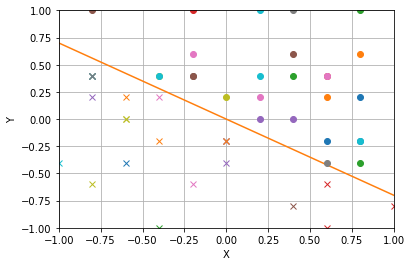

In [307]:
w = [0,0,0]
# Data = [[1,0],[-1,0],[1,1]]
# Target = [1,-1,1]
z = np.ones((count,1))
Data3 = np.concatenate((z, Data), axis=1)
# print(Data3)
# PLA
for i in range(0,10000):
    n = i % count;
    
    if(Ein(w, Data3, Target) == 0):
        break
    
    d = np.dot(w, Data3[n])
    
    if(d == 0 or (d > 0 and Target[n] < 0) or (d < 0 and Target[n] > 0) ):
        w = w + Target[n] * Data3[n]
        
    #print(w)
        
# Draw the line again

a, b = VectorToAB(w)
x = np.linspace(-1,1)
y = a * x + b
        
# Plot the diagram
line = plt.figure();
plt.plot(w[0],w[1], '+')
plt.plot(x,y)
    
for i in range(0,count):
    if(Target[i] == 1):
        plt.plot(Data[i,0],Data[i,1], 'x')
    else:
        plt.plot(Data[i,0],Data[i,1], 'o')

plt.grid(1);
plt.xlabel('X');
plt.ylabel('Y');
plt.xlim([-1,1]);
plt.ylim([-1,1]);
plt.show()